# Setup

## Device

In [1]:
import torch

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Data preparation

## Load data

In [2]:
from data import load_data

train_path = './data/train_data.csv'
test_path = './data/test_data.csv'

X_train_all, y_train_all = load_data(train_path, target='SalePrice')
X_test, _ = load_data(test_path)

X_train_all.head()

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0


## Preprocess data

### Split data

In [3]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

print("Size of training set: ", X_train.shape)
print("Size of validation set: ", X_val.shape)

Size of training set:  (3299, 16)
Size of validation set:  (825, 16)


### Polynomial features

In [4]:
# from data import polynomial_expansion
# import numpy as np

# numeric_features = ['Floor', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']
# numeric_features = X_train_all.select_dtypes(include=np.number).columns.tolist()

# X_train_poly = polynomial_expansion(X_train, numeric_features, degree=2)
# X_val_poly = polynomial_expansion(X_val, numeric_features, degree=2)

# X_train_poly.head()

### Categorical features

In [4]:
categorical_cols = X_train_all.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train_all.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_indices = [X_train_all.columns.get_loc(col) for col in categorical_cols]
numeric_indices = [X_train_all.columns.get_loc(col) for col in numeric_cols]

print("Categorical cols: ", categorical_cols)
print("Numeric cols: ", numeric_cols)

Categorical cols:  ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway', 'SubwayStation']
Numeric cols:  ['YearBuilt', 'Size(sqf)', 'Floor', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_manager', 'N_elevators', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']


In [5]:
from data import one_hot_encode

X_train_oh = X_train.copy()
X_val_oh = X_val.copy()
X_test_oh = X_test.copy()

for col in categorical_cols:
    X_train_oh = one_hot_encode(X_train_oh, col)
    X_val_oh = one_hot_encode(X_val_oh, col)
    X_test_oh = one_hot_encode(X_test_oh, col)

X_train_oh.head()

,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
3162,1993,914,9,523.0,536.0,8.0,20.0,4,14.0,17.0,...,False,False,False,False,False,False,False,True,False,False
2514,2007,868,24,0.0,1270.0,14.0,16.0,10,9.0,10.0,...,False,False,False,False,False,False,True,False,False,False
1894,2006,1149,18,249.0,536.0,5.0,11.0,5,3.0,7.0,...,False,False,False,False,False,False,False,False,True,False
3612,2005,914,12,67.0,798.0,6.0,0.0,7,13.0,15.0,...,True,False,True,False,False,False,False,False,False,False
3349,2013,644,3,8.0,930.0,6.0,14.0,7,9.0,11.0,...,False,False,False,False,False,False,True,False,False,False


In [6]:
from data import index_encode

X_train_ie = X_train.copy()
X_val_ie = X_val.copy()
X_test_ie = X_test.copy()

for col in categorical_cols:
    X_train_ie, mappings = index_encode(X_train_ie, col)
    X_val_ie, _ = index_encode(X_val_ie, col, mappings=mappings)
    X_test_ie, _ = index_encode(X_test_ie, col, mappings=mappings)

X_train_ie.head()

,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
3162,1993,914,9,523.0,536.0,8.0,20.0,4,14.0,17.0,0,0,0,0,0,0
2514,2007,868,24,0.0,1270.0,14.0,16.0,10,9.0,10.0,1,0,0,0,1,1
1894,2006,1149,18,249.0,536.0,5.0,11.0,5,3.0,7.0,1,0,0,0,1,2
3612,2005,914,12,67.0,798.0,6.0,0.0,7,13.0,15.0,0,0,0,0,2,3
3349,2013,644,3,8.0,930.0,6.0,14.0,7,9.0,11.0,1,0,0,0,1,1


### Standardize numerical features

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

X_train_oh[numeric_cols] = scaler.transform(X_train_oh[numeric_cols])
X_val_oh[numeric_cols] = scaler.transform(X_val_oh[numeric_cols])
X_test_oh[numeric_cols] = scaler.transform(X_test_oh[numeric_cols])

X_train_ie[numeric_cols] = scaler.transform(X_train_ie[numeric_cols])
X_val_ie[numeric_cols] = scaler.transform(X_val_ie[numeric_cols])
X_test_ie[numeric_cols] = scaler.transform(X_test_ie[numeric_cols])

### Upsample minority classes

In [8]:
class_distribution = y_train.value_counts(normalize=True)
class_distribution

SalePrice
1    0.726887
2    0.140042
0    0.133071
Name: proportion, dtype: float64

In [10]:
# TODO: maybe use SMOTE?

# from imblearn.over_sampling import SMOTE
# import numpy as np

# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

# print("After SMOTE:", np.bincount(y_train))

### Datasets

In [9]:
class_weights = { 0: 1 / class_distribution[0], 1: 1 / class_distribution[1], 2: 1 / class_distribution[2] }

# TODO: remove

# class_weights[0] *= 2
# class_weights[2] *= 2

class_weights

{0: np.float64(7.514806378132118),
 1: np.float64(1.3757297748123436),
 2: np.float64(7.140692640692641)}

In [10]:
# convert all non-numeric values to float32

X_train_oh = X_train_oh.values.astype('float32')
X_val_oh = X_val_oh.values.astype('float32')
X_test_oh = X_test_oh.values.astype('float32')

X_train_ie = X_train_ie.values.astype('float32')
X_val_ie = X_val_ie.values.astype('float32')
X_test_ie = X_test_ie.values.astype('float32')

In [11]:
from data import to_dataloader

train_loader_oh = to_dataloader(X_train_oh, y_train.values, batch_size=1024, class_weights=class_weights)
val_loader_oh = to_dataloader(X_val_oh, y_val.values)

train_loader_ie = to_dataloader(X_train_ie, y_train.values, batch_size=1024, class_weights=class_weights)
val_loader_ie = to_dataloader(X_val_ie, y_val.values)

In [12]:
vector_size_oh = X_train_oh.shape[1]
vector_size_ie = X_train_ie.shape[1]

print("Vector size (one-hot encoded): ", vector_size_oh)
print("Vector size (index encoded): ", vector_size_ie)

Vector size (one-hot encoded):  33
Vector size (index encoded):  16


In [13]:
num_classes = len(class_distribution)

print("Number of classes: ", num_classes)

Number of classes:  3


# Model

In [14]:
import torch.nn as nn

class DefaultNeuralNetwork(nn.Module):
    def __init__(self, input_size: int, layer_size: int = 1024, output_size: int = 1, dropout: float = 0.2):
        super().__init__()

        self.seq = nn.Sequential(
            nn.Linear(input_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, output_size),
            # nn.Sigmoid()
        )

    def forward(self, x):
        return self.seq(x)

In [21]:
import numpy as np
import torch
import torch.nn as nn

def get_unique_features(X, index, multiplier=2):
    return np.unique(X[:, index]).shape[0] * multiplier

class EmbeddingNeuralNetwork(nn.Module):
    def __init__(self, base_input_size: int, layer_size: int = 1024, output_size: int = 1, dropout: float = 0.2):
        super().__init__()

        embedding_dim = 32
        self.embeddings = nn.ModuleDict({
            str(feature): nn.Embedding(get_unique_features(X_train, feature), embedding_dim)
            for feature in categorical_indices
        })

        input_size = base_input_size + len(categorical_indices) * (embedding_dim - 1)

        self.seq = nn.Sequential(
            nn.Linear(input_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, output_size),
            # nn.Sigmoid()  # Uncomment if needed.
        )

    def forward(self, x: list):
        numerical = x[:, numeric_indices].float()
        embedded_features = []
        
        for feature in categorical_indices:
            cat_column = x[:, feature].long()
            emb = self.embeddings[str(feature)](cat_column)
            embedded_features.append(emb)

        embedded = torch.cat(embedded_features, dim=1)
        x_combined = torch.cat([numerical, embedded], dim=1)

        return self.seq(x_combined)

# Experiments

In [16]:
def ordinal_loss(preds, targets, weights=(0.5, 2)):
    target1 = (targets > 0).float()
    target2 = (targets > 1).float()

    target1_weight, target2_weight = weights

    loss1 = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(target1_weight))(preds[:, 0], target1)
    loss2 = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(target2_weight))(preds[:, 1], target2)

    return loss1 + loss2


### Smaller networks

In [33]:
class SmallDefaultNeuralNetwork(nn.Module):
    def __init__(self, input_size: int, layer_size: int = 1024, output_size: int = 1, dropout: float = 0.2):
        super().__init__()

        self.seq = nn.Sequential(
            nn.Linear(input_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            # nn.Linear(layer_size, layer_size),
            # nn.BatchNorm1d(layer_size),
            # nn.LeakyReLU(),
            # nn.Dropout(dropout),
            nn.Linear(layer_size, output_size),
            # nn.Sigmoid()
        )

    def forward(self, x):
        return self.seq(x)


class SmallEmbeddingNeuralNetwork(nn.Module):
    def __init__(self, base_input_size: int, layer_size: int = 1024, output_size: int = 1, dropout: float = 0.2):
        super().__init__()

        embedding_dim = 32
        self.embeddings = nn.ModuleDict({
            str(feature): nn.Embedding(get_unique_features(X_train, feature), embedding_dim)
            for feature in categorical_indices
        })

        input_size = base_input_size + len(categorical_indices) * (embedding_dim - 1)

        self.seq = nn.Sequential(
            nn.Linear(input_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            # nn.Linear(layer_size, layer_size),
            # nn.BatchNorm1d(layer_size),
            # nn.LeakyReLU(),
            # nn.Dropout(dropout),
            nn.Linear(layer_size, output_size),
            # nn.Sigmoid()  # Uncomment if needed.
        )

    def forward(self, x: list):
        numerical = x[:, numeric_indices].float()
        embedded_features = []
        
        for feature in categorical_indices:
            cat_column = x[:, feature].long()
            emb = self.embeddings[str(feature)](cat_column)
            embedded_features.append(emb)

        embedded = torch.cat(embedded_features, dim=1)
        x_combined = torch.cat([numerical, embedded], dim=1)

        return self.seq(x_combined)

In [54]:
from train import Trainer, predict
from utils import pred_to_class
from plots import plot_pred_acc

layer_sizes = [256, 512, 1024, 2048]
dropouts = [0.1, 0.2, 0.3]

for layer_size in layer_sizes:
    for dropout in dropouts:
        nn_model = DefaultNeuralNetwork(vector_size_oh, layer_size=layer_size, output_size=num_classes-1, dropout=dropout)
        small_model = SmallDefaultNeuralNetwork(vector_size_oh, layer_size=layer_size, output_size=num_classes-1, dropout=dropout)
        models = [nn_model, small_model]
        trainers = [train_loader_ie, train_loader_oh]
        vals = [val_loader_ie, val_loader_oh]
        Xs = [X_val_ie, X_val_oh]
        for model in models:
            for i, trainer in enumerate(trainers):
                optim = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=2e-1)
                scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1, verbose=True)
                criterion = ordinal_loss

                trainer = Trainer(model)
                trainer.to_device(device)
                trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)

                trainer.fit(trainer, vals[i], epochs=100, print_progress=False)
                y_pred_nn = predict(model, Xs[i], device)
                y_pred_nn = pred_to_class(y_pred_nn, threshold=0.5)
                plot_pred_acc(y_val, y_pred_nn)


TypeError: object of type 'Trainer' has no len()

## Default NN

Epoch  1/100 - Train Loss: 1.00 - Val Loss: 1.17 - Val Acc: 0.3333 - LR: 0.0001
Epoch  2/100 - Train Loss: 0.74 - Val Loss: 1.10 - Val Acc: 0.3333 - LR: 0.0001
Epoch  3/100 - Train Loss: 0.61 - Val Loss: 1.00 - Val Acc: 0.3350 - LR: 0.0001
Epoch  4/100 - Train Loss: 0.56 - Val Loss: 0.85 - Val Acc: 0.8106 - LR: 0.0001
Epoch  5/100 - Train Loss: 0.56 - Val Loss: 0.72 - Val Acc: 0.8523 - LR: 0.0001
Epoch  6/100 - Train Loss: 0.46 - Val Loss: 0.61 - Val Acc: 0.8632 - LR: 0.0001
Epoch  7/100 - Train Loss: 0.44 - Val Loss: 0.52 - Val Acc: 0.8528 - LR: 0.0001
Epoch  8/100 - Train Loss: 0.43 - Val Loss: 0.44 - Val Acc: 0.8667 - LR: 0.0001
Epoch  9/100 - Train Loss: 0.41 - Val Loss: 0.40 - Val Acc: 0.8628 - LR: 0.0001
Epoch 10/100 - Train Loss: 0.41 - Val Loss: 0.39 - Val Acc: 0.8570 - LR: 0.0001
Epoch 11/100 - Train Loss: 0.38 - Val Loss: 0.37 - Val Acc: 0.8553 - LR: 0.0001
Epoch 12/100 - Train Loss: 0.38 - Val Loss: 0.36 - Val Acc: 0.8653 - LR: 0.0001
Epoch 13/100 - Train Loss: 0.38 - Val Lo

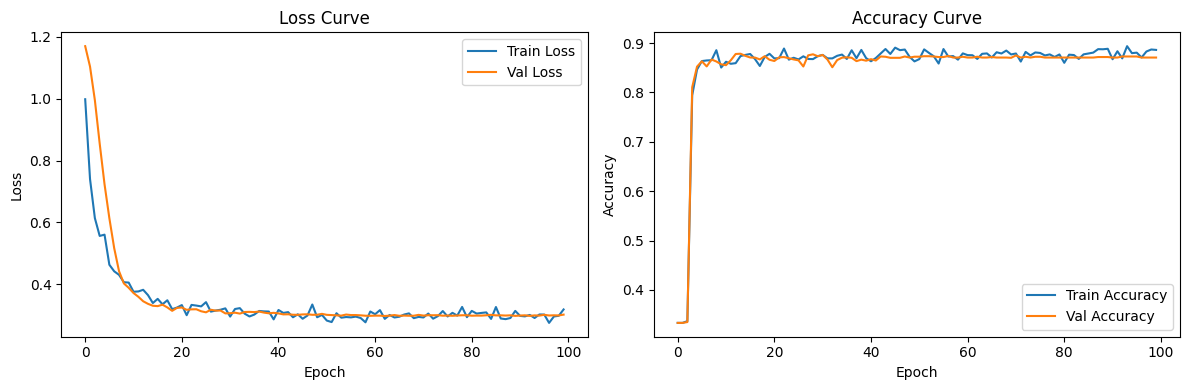

In [51]:
from train import Trainer

nn_model = DefaultNeuralNetwork(input_size=vector_size_oh, layer_size=1024, output_size=num_classes-1, dropout=0.1)
optim = torch.optim.AdamW(nn_model.parameters(), lr=1e-4, weight_decay=2e-1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1, verbose=True)
criterion = ordinal_loss

trainer = Trainer(nn_model)
trainer.to_device(device)
trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)

trainer.fit(train_loader_oh, val_loader_oh, epochs=100)

## Embedding NN

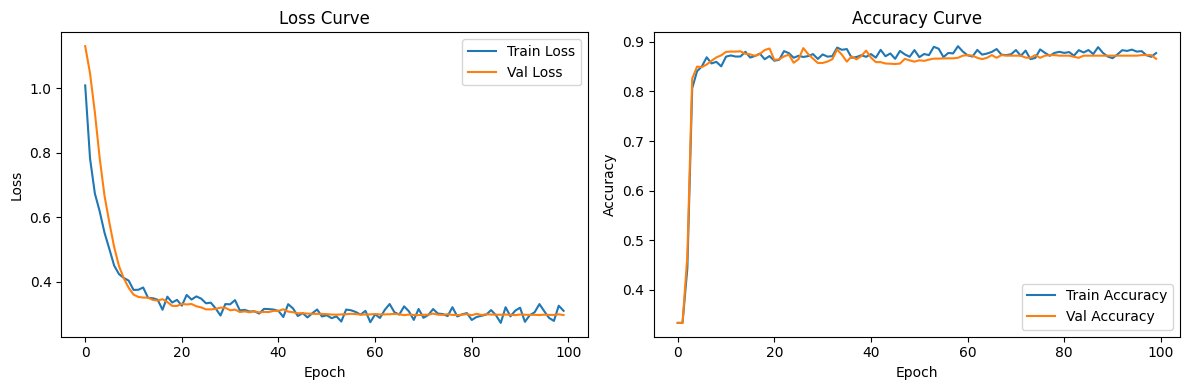

In [ ]:
from train import Trainer

emb_model = DefaultNeuralNetwork(input_size=vector_size_ie, layer_size=1024, output_size=num_classes-1, dropout=0.1)
optim = torch.optim.AdamW(emb_model.parameters(), lr=1e-4, weight_decay=2e-1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1, verbose=True)
criterion = ordinal_loss

trainer = Trainer(emb_model)
trainer.to_device(device)
trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)

trainer.fit(train_loader_ie, val_loader_ie, epochs=100)

# Evaluation

In [43]:
from train import predict

y_pred_nn = predict(nn_model, X_val_oh, device)
y_pred_embd = predict(emb_model, X_val_ie, device)

### Accuracy curve

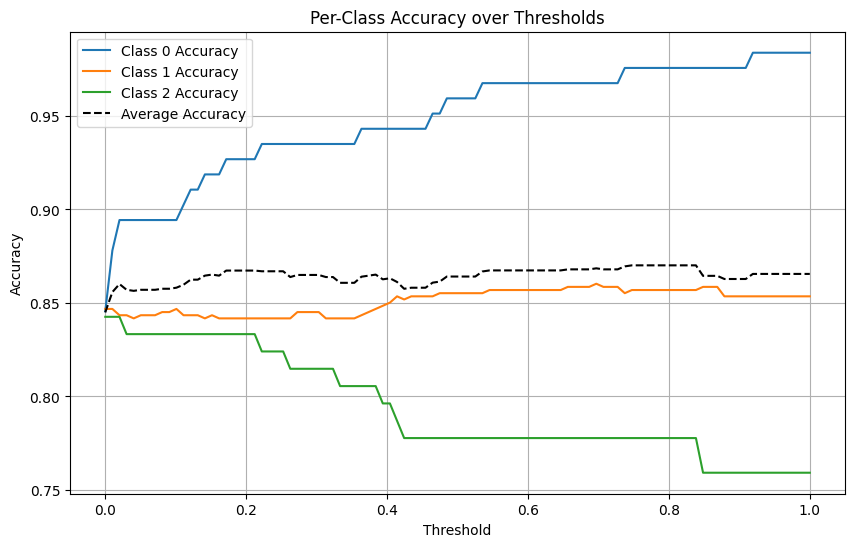

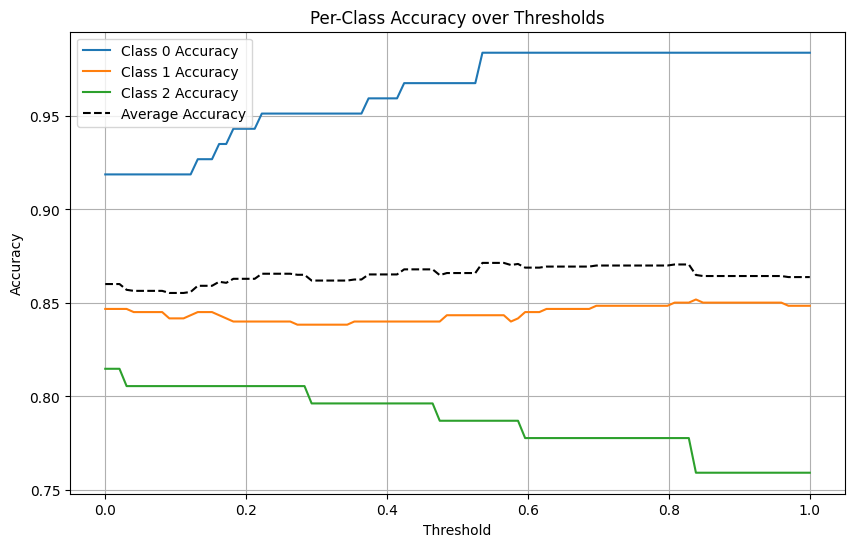

In [44]:
from plots import plot_acc_over_thresholds

plot_acc_over_thresholds(y_val, y_pred_nn)
plot_acc_over_thresholds(y_val, y_pred_embd)

In [45]:
from utils import pred_to_class


pred_class_nn = pred_to_class(y_pred_nn, threshold=(0.5, 0.5)).numpy()
pred_class_embd = pred_to_class(y_pred_embd, threshold=(0.5, 0.5)).numpy()

### Accuracy per class

model accuracy with no embedding: 
Class 0 accuracy: 0.85
Class 1 accuracy: 0.85
Class 2 accuracy: 0.84
Average class accuracy: 0.84


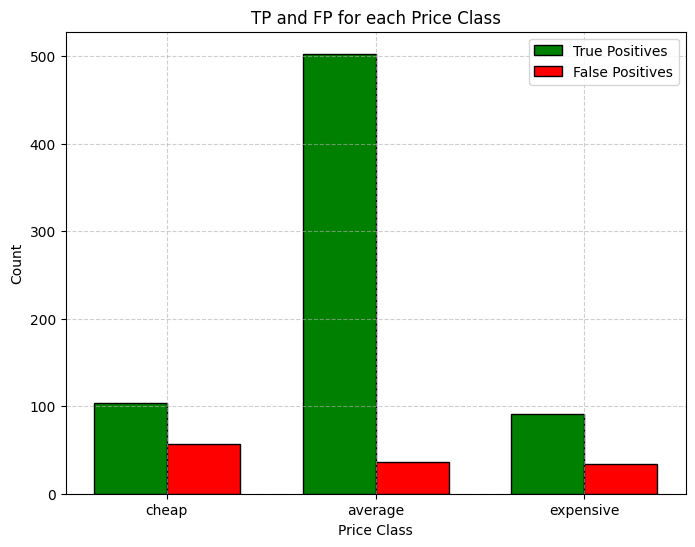

model accuracy with embedding: 
Class 0 accuracy: 0.92
Class 1 accuracy: 0.85
Class 2 accuracy: 0.81
Average class accuracy: 0.86


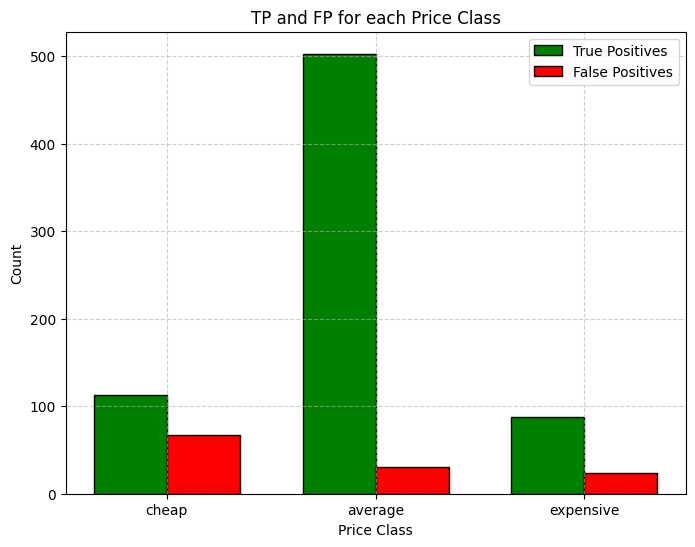

In [46]:
from plots import plot_pred_acc


print("model accuracy with no embedding: ")
plot_pred_acc(y_val, pred_class_nn)
print("model accuracy with embedding: ")
plot_pred_acc(y_val, pred_class_embd)

### Confusion matrix

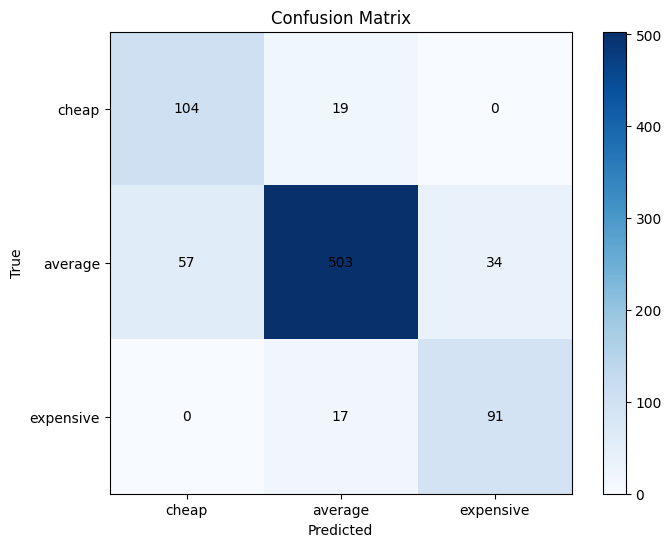

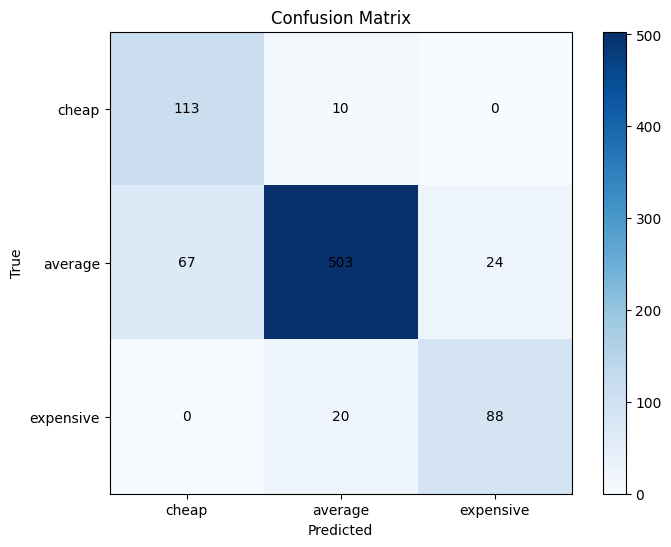

In [47]:
from plots import plot_confusion_matrix

plot_confusion_matrix(y_val, pred_class_nn)
plot_confusion_matrix(y_val, pred_class_embd)

# Save results

In [26]:
from train import save_results

test_results = save_results(nn_model, X_test_oh, device=device)

test_results.head()

,0
0,1
1,2
2,2
3,1
4,1
